# Task 1
Construir un programa que reciba como entrada una imagen cuadrada que represente un laberinto. Deberá dibujar en pantalla la solución al mismo. Deberá considerar las siguientes restricciones:
- Las dimensiones de entrada podrán variar entre ejecuciones (pero siempre será una imagen cuadrada)
- Las áreas blancas representan caminos libres
- Las áreas negras representan paredes sobre las cuales no se puede pasar
- Las áreas verdes representan la meta (goalTest positivos) (pueden ser varios)
- La área roja representa el punto de inicio (solo podrá haber uno)



## Task 1.1 Discretización de la imagen

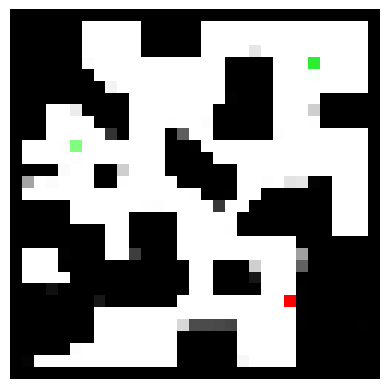

Matriz discretizada:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def discretize_image_and_matrix(image_path, pixel_size):
    # Abrir la imagen
    image = Image.open(image_path)
    image = image.convert('RGB')

    # Convertir la imagen a un array numpy
    image_array = np.array(image)
    height, width, _ = image_array.shape

    # Crear una nueva imagen con el tamaño adecuado para agregar el marco negro
    padded_height = height + 2 * pixel_size
    padded_width = width + 2 * pixel_size
    padded_image_array = np.zeros((padded_height, padded_width, 3), dtype=np.uint8)

    # Agregar el marco negro alrededor de la imagen original
    padded_image_array[pixel_size:pixel_size + height, pixel_size:pixel_size + width, :] = image_array

    # Ajustar las dimensiones de la imagen para que sean múltiplos de pixel_size
    new_height = (padded_height // pixel_size) * pixel_size
    new_width = (padded_width // pixel_size) * pixel_size
    padded_image_array = padded_image_array[:new_height, :new_width]

    discretized_height = new_height // pixel_size
    discretized_width = new_width // pixel_size
    discretized_img = np.zeros((discretized_height, discretized_width, 3), dtype=np.uint8)
    discretized_matrix = np.zeros((discretized_height, discretized_width), dtype=np.uint8)

    start_point = None
    end_points = []

    for i in range(0, new_height, pixel_size):
        for j in range(0, new_width, pixel_size):
            region = padded_image_array[i:i + pixel_size, j:j + pixel_size, :]

            # Tomar el color del primer píxel de la región
            pixel_color = region[pixel_size // 2, pixel_size // 2, :]
            discretized_img[i // pixel_size, j // pixel_size, :] = pixel_color

            # Identificar y cambiar píxeles grises a negro por su código RGB
            if np.all(region[:, :, 0] >= 0) and np.all(region[:, :, 0] <= 225):
                pixel_color = [0, 0, 0]  # Cambiar a color negro
            
            # Asignar valor a la matriz discretizada
            if np.all(pixel_color == [0, 0, 0]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 1  # Representa una pared
            elif np.all(pixel_color >= [0, 200, 0]) and np.all(pixel_color <= [50, 255, 50]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 0  # Representa el objetivo (verde)
                end_points.append((i // pixel_size, j // pixel_size))  # Guardar coordenadas del punto final
            elif np.all(pixel_color >= [220, 0, 0]) and np.all(pixel_color <= [255, 50, 50]):
                discretized_matrix[i // pixel_size, j // pixel_size] = 0  # Representa el inicio (rojo)
                start_point = (i // pixel_size, j // pixel_size)  # Guardar coordenadas del punto de inicio

    return discretized_img, discretized_matrix, start_point, end_points

def plot_discretized_image(discretized_img):
    plt.imshow(discretized_img)
    plt.axis('off')
    plt.show()

# Ruta de la imagen y tamaño de píxel deseado
image_path = "Test2.bmp"
pixel_size = 20  # Ajusta el tamaño del píxel según sea necesario

# Discretizar la imagen y obtener la matriz discretizada
discretized_img, discretized_matrix, start_point, end_points = discretize_image_and_matrix(image_path, pixel_size)

# Visualizar la imagen discretizada
plot_discretized_image(discretized_img)

# Mostrar la matriz discretizada
print("Matriz discretizada:")
print(discretized_matrix)

# Mostrar las coordenadas del punto de inicio (rojo) y de los puntos finales (verdes)
print("Coordenadas del punto de inicio (rojo):", start_point)
print("Coordenadas de los puntos finales (verdes):", end_points)


## Task 1.2 Framework de Problemas
Usar interfaz genérica o abstracta que sirva para representar el framework para definir el problema formal. Se debe utilizar la matriz obtenida del Task 1.1 y con esta deberá deducir las demás funciones del framework. (actions(s), stepCost(s,a,s), etc). Debe utilizar efectivamente los conceptos del paradigma POO. 

In [20]:
from abc import ABC, abstractmethod
from typing import List, Tuple

class SearchAlgorithm(ABC):
    def __init__(self, maze: List[List[int]]):
        self.maze = maze
        self.rows = len(maze)
        self.columns = len(maze[0]) if self.rows > 0 else 0

    # chequea si un movimiento es válido 
    def valid_move(self, position : Tuple[int, int]) -> bool:
        row, column = position
        if 0 <= row < self.rows and 0 <= column < self.columns:
            return self.maze[row][column] == 0
        return False
    
    @abstractmethod 
    def actions(self, position: Tuple[int, int]) -> List[Tuple[int, int]]:
        pass
    

    @abstractmethod
    def search(self, start: Tuple[int, int], goal: Tuple[int, int]) -> List[Tuple[int, int]]:
        pass


## Task 1.3 Graph-Search 
Construir el algoritmo genérico (familia de graphSearch). Este recibirá de parámetro una instancia del framework de problemas. Implemente los siguientes algoritmos:
- Breadth First Search (BFS)
- Depth First Search (DFS)
- A* (escoger dos heurísticas, justificar elección)

## TASK 1.3
### Breadth First Search (BFS)

## TASK 1.3
### Depth First Search (DFS)

## TASK 1.3
### A* 

In [21]:
# Incluir ambas heurísticas aquí
import heapq


class AStarSearch(SearchAlgorithm):
    def actions(self, position: Tuple[int, int]) -> List[Tuple[int, int]]:
        # Definir movimientos
        potential_moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        # Retornar solo movimientos válidos 
        return [(position[0] + move[0], position[1] + move[1]) for move in potential_moves if self.valid_move((position[0] + move[0], position[1] + move[1]))]
    

    # Distancia de Manhattan
    def heuristic(self, current: Tuple[int, int], goals: List[Tuple[int, int]]) -> int:
        return min(abs(current[0] - goal[0]) + abs(current[1] - goal[1]) for goal in goals)


    def search(self, start: Tuple[int, int], goal: List[Tuple[int, int]]) -> List[Tuple[int, int]]:
        frontier = []
        heapq.heappush(frontier, (0 + self.heuristic(start, goal), 0, start))  
        came_from = {start: None}
        cost_so_far = {start: 0}

        while frontier:
            current_f, current_g, current = heapq.heappop(frontier)

            if current in goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                return path[::-1]  # Camino reverso

            for next in self.actions(current):
                new_cost = cost_so_far[current] + 1  # asumiendo el costo es 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + self.heuristic(next, goal)
                    heapq.heappush(frontier, (priority, new_cost, next))
                    came_from[next] = current

        return None 
astar = AStarSearch(discretized_matrix)
print(astar.search((22,22), [(4, 12), (9, 2)]))


[(22, 22), (21, 22), (20, 22), (19, 22), (19, 21), (19, 20), (19, 19), (19, 18), (18, 18), (17, 18), (16, 18), (16, 17), (16, 16), (16, 15), (15, 15), (15, 14), (15, 13), (14, 13), (14, 12), (13, 12), (12, 12), (11, 12), (10, 12), (9, 12), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12)]


## TASK 1.4
Resolver el laberinto de entrada y mostrar en pantalla gráficamente el camino encontrado. **Su representación se basará en la matriz discreta, no en la imagen original.**  